In [1]:
### Kinetics Database creation


In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

In [2]:
url =  "http://bldb.eu/M-BLDB.php"
url = "http://bldb.eu/F-BLDB.php"
response = requests.get(url)


In [3]:
soup = BeautifulSoup(response.content, 'html.parser')


In [4]:
table = soup.find_all('table')  # Replace 'table' with the appropriate HTML element or attributes


In [5]:
print(table)

[<table style="width:80%;background-color:#FFF7DC;">
<tr>
<td><img alt="Beta-Lactamase DataBase" src="BLDB_logo.png" style="width:77px;height:98px;border:0"/></td>
<td><center><svg viewbox="0 0 750 98" width="80%"> <g class="hover_group"><a target="_blank" xlink:href="."><rect height="35" rx="10" ry="10" style="stroke:#E6B800; fill: #FFCC00" width="750" x="0" y="0"></rect> <text fill="black" font-family="Arial,Helvetica Neue,Helvetica,sans-serif" font-size="25" font-weight="normal" x="75" y="25"><tspan fill="red" font-weight="bold">B</tspan>eta-<tspan fill="red" font-weight="bold">L</tspan>actamase <tspan fill="red" font-weight="bold">D</tspan>ata<tspan fill="red" font-weight="bold">B</tspan>ase - Structure and Function</text></a></g> <line style="stroke:rgb(0,0,0);stroke-width:1" x1="0" x2="750" y1="43" y2="43"></line> <g class="hover_group"><a target="_blank" xlink:href="."><rect height="35" rx="10" ry="10" style="stroke:#E6B800; fill: #FFCC00" width="121" x="0" y="50"></rect> <text 

In [6]:
#column names are in the first row
headers = pd.read_html(str(table))[1]
#convert to list
headers = headers.values[0].tolist()
headers.insert(0, 'id') 
print(headers)
df = pd.read_html(str(table))[2]

df.columns = headers

df["CLASS"] = df.id.apply(lambda x: x.split(' ')[0])
df.head()


['id', 'Benzylpenicillin (BPN)', 'Penicillin G (PCG)', 'Amoxicillin (AMO)', 'Ampicillin (AMP)', 'Oxacillin (OXA)', 'Cloxacillin (CLX)', 'Carbenicillin (CRB)', 'Methicillin (MTL)', 'Ticarcillin (TIC)', 'Temocillin (TEM)', 'Piperacillin (PIP)', 'Azlocillin (AZL)', 'Mezlocillin (MZL)', 'Cefalothin (CFT)', 'Cefuroxime (CFU)', 'Cefotaxime (CFX)', 'Ceftazidime (CFZ)', 'Cefepime (CFP)', 'Cefpirome (CFR)', 'Cefoxitin (CFN)', 'Cephaloridin (CFD)', 'Cefazolin (CEF)', 'Cefazolin (V0) (CF0)', 'Cefazolin (Vss) (CFS)', 'Cefsulodin (CFI)', 'Aztreonam (AZT)', 'Imipenem (IMI)', 'Meropenem (MER)', 'Ertapenem (ERT)', 'Panipenem (PAN)', 'Faropenem (FAR)', 'Doripenem (DOR)', 'Nitrocefin (NIT)', 'Clavulanic acid (CLA)', 'CENTA (CEN)']


,id,Benzylpenicillin (BPN),Penicillin G (PCG),Amoxicillin (AMO),Ampicillin (AMP),Oxacillin (OXA),Cloxacillin (CLX),Carbenicillin (CRB),Methicillin (MTL),Ticarcillin (TIC),...,Imipenem (IMI),Meropenem (MER),Ertapenem (ERT),Panipenem (PAN),Faropenem (FAR),Doripenem (DOR),Nitrocefin (NIT),Clavulanic acid (CLA),CENTA (CEN),CLASS
0,A • GES-1 22908160 Show profile:,30 120 250,NaN,13 180 72,NaN,NaN,NaN,NaN,NaN,7 1000 7,...,0.007 1.5 5,0.0007 0.1 7,0.003 0.4 7.5,NaN,NaN,NaN,380 340 1100,NaN,NaN,A
1,A • GES-5 22908160 Show profile:,110 430 255,NaN,13 50 260,NaN,NaN,NaN,NaN,NaN,5 1600 3,...,0.7 4.6 150,0.06 1 60,0.09 1.5 60,NaN,NaN,NaN,260 550 470,NaN,NaN,A
2,A • GES-11 22908160 Show profile:,4 37 110,NaN,7 37 190,NaN,NaN,NaN,NaN,NaN,2.6 37 70,...,0.015 1 15,0.0035 0.1 35,0.002 0.2 10,NaN,NaN,NaN,320 530 600,NaN,NaN,A
3,A • GES-12 22908160 Show profile:,16 60 270,NaN,16 73 220,NaN,NaN,NaN,NaN,NaN,4.6 214 21,...,0.02 1 20,0.008 0.06 130,0.007 0.07 100,NaN,NaN,NaN,72 215 330,NaN,NaN,A
4,A • GES-14 22908160 Show profile:,23 300 77,NaN,7 130 54,NaN,NaN,NaN,NaN,NaN,0.2 32 6,...,0.09 2.9 31,0.01 0.2 50,0.01 0.3 33,NaN,NaN,NaN,56 135 415,NaN,NaN,A


In [7]:
#remove the id and CLASS column
no_ids = df.drop(['id', 'CLASS'], axis=1)


# apply transformation to all values in the data 

no_ids = no_ids.applymap(lambda x: x.split(' ')[-1] if isinstance(x,str) else x)

# strip < and > from the values
no_ids = no_ids.applymap(lambda x: x.strip('<') if isinstance(x, str) else x)
no_ids = no_ids.applymap(lambda x: x.strip('>') if isinstance(x, str) else x)
no_ids = no_ids.applymap(lambda x: x.replace('H',"0") if isinstance(x, str) else x)

#set ND to NaN
no_ids = no_ids.applymap(lambda x: float('NaN') if x == 'ND' else x)
no_ids = no_ids.applymap(lambda x: float('NaN') if x == 'NA' else x)

# print(no_ids.head())
#conver to numeric
no_ids = no_ids.apply(pd.to_numeric)

no_ids.head()

# add CLASS an id column back
no_ids['CLASS'] = df['CLASS']
no_ids['id'] = df['id']


# remove "Benzylpenicillin (BPN)" bc it has a massive number
no_ids = no_ids.drop('Benzylpenicillin (BPN)', axis=1)

# drop CLASS B1 and B3
no_ids = no_ids[no_ids.CLASS != 'B1']
no_ids = no_ids[no_ids.CLASS != 'B3']


In [8]:
#apply function to a single column
no_ids["ID"]= no_ids["id"].apply(lambda x: x.split(' ')[2:])
no_ids["ID"] = no_ids["ID"].apply(lambda x: x[:-3])
no_ids["ID"] = no_ids["ID"].apply(lambda x: x+["WT"] if len(x) != 2 else x)
no_ids["ID"] = no_ids["ID"].apply(lambda x: "_".join(x))

In [9]:
for i in no_ids.ID:
    print(i)

GES-1_WT
GES-5_WT
GES-11_WT
GES-12_WT
GES-14_WT
GES-18_WT
KPC-2_WT
KPC-2_WT
KPC-2_WT
KPC-2_W105F
KPC-2_W105N
KPC-2_W105L
KPC-2_W105V
KPC-2_T237S
KPC-2_T237A
KPC-2_R220H
KPC-2_R220A
KPC-2_R220M
KPC-2_R220K
KPC-2_E276A
KPC-2_E276D
OXA-1_WT
OXA-2_WT
OXA-20_WT
OXA-22_WT
OXA-29_WT
OXA-32_WT
OXA-40_WT
OXA-46_WT
OXA-48_WT
OXA-48_WT
OXA-54_WT
OXA-57_WT
OXA-57_D170N
OXA-57_K232N
OXA-85b_WT
OXA-114a_WT
OXA-163_WT
OXA-181_WT
OXA-232_WT


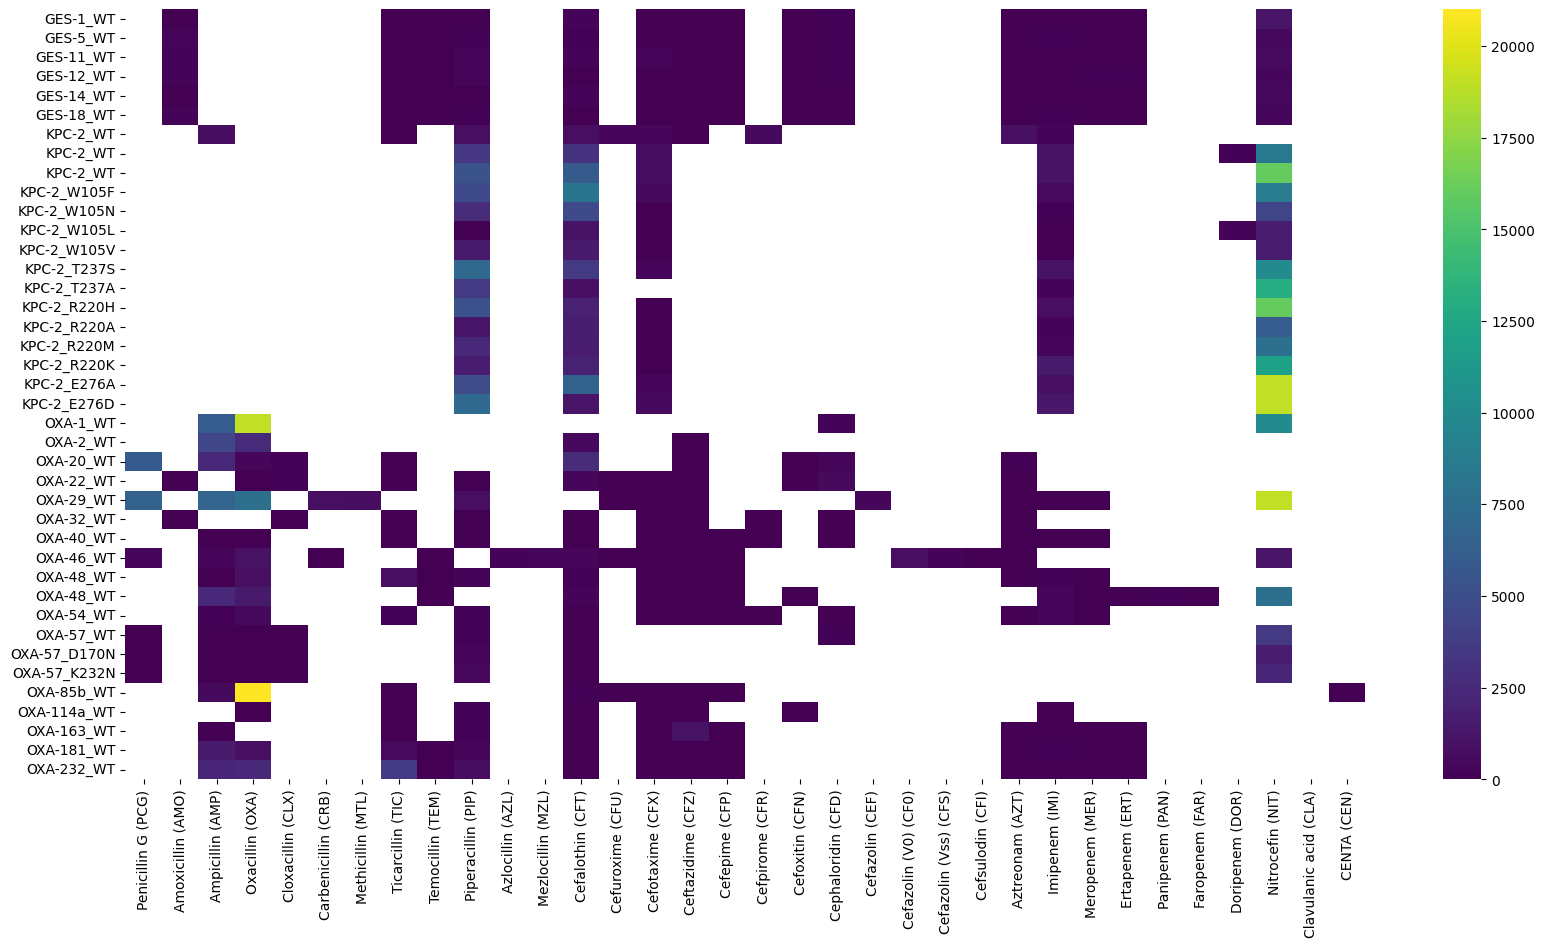

In [10]:

#plot the data as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

#do heatmap plotting dataframe without CLASS with CLASS as the y axis
sns.heatmap(no_ids.drop(['CLASS','id','ID'], axis=1), yticklabels=no_ids['ID'], cmap='viridis')
plt.show()

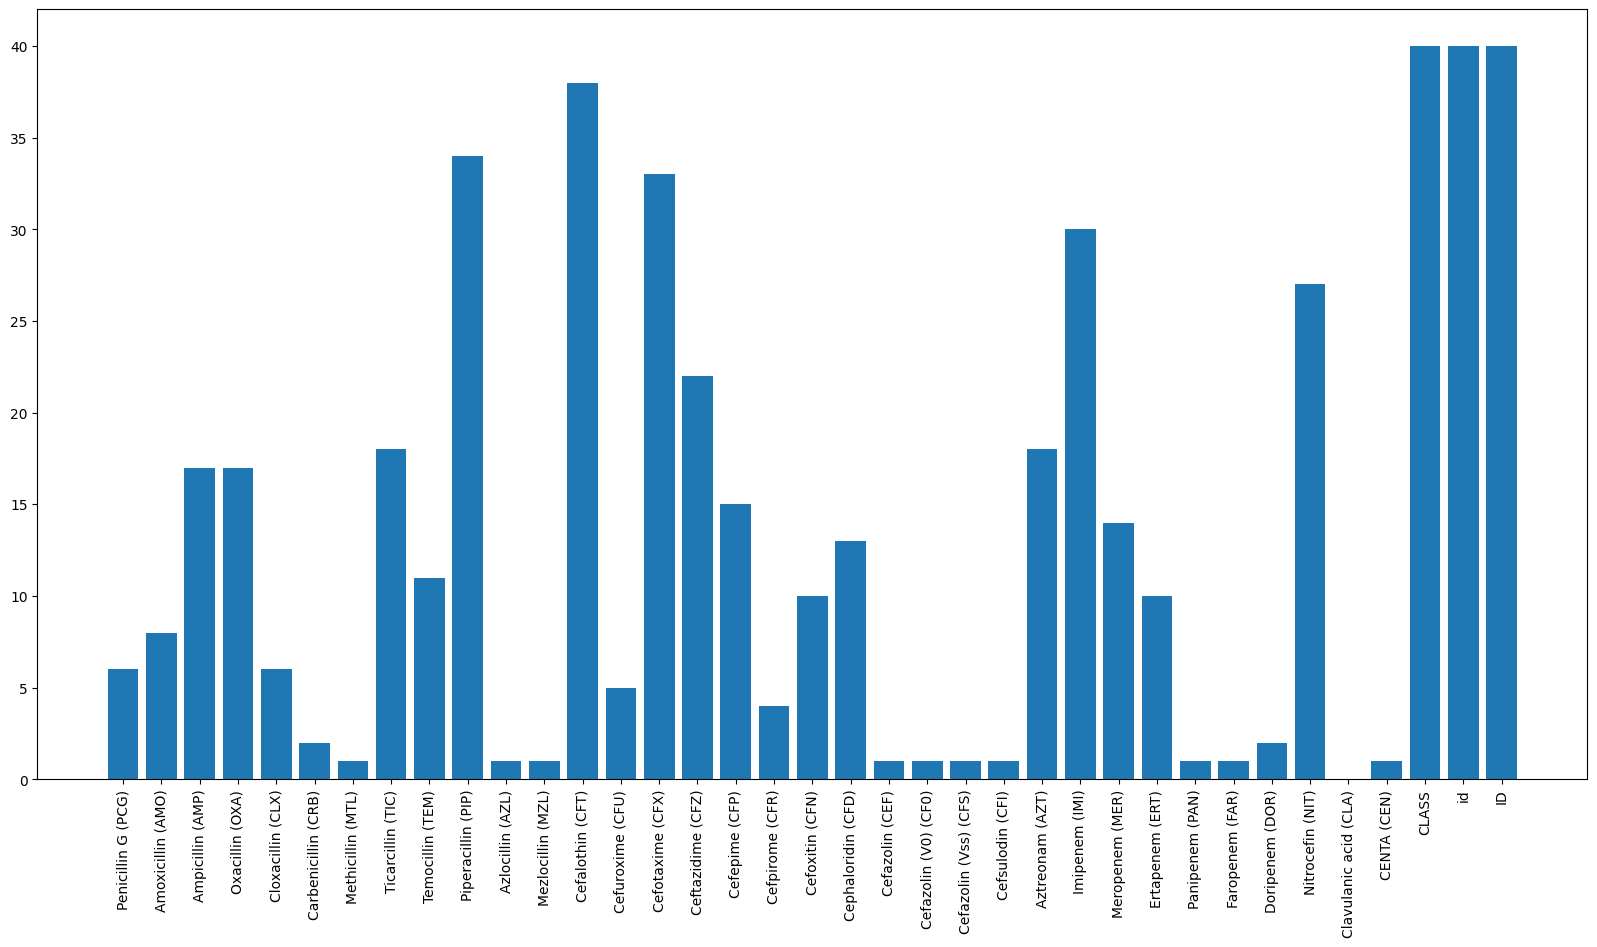

In [11]:
# plot number of values in each column as a bar chart

plt.figure(figsize=(20,10))
plt.bar(no_ids.columns, no_ids.count())
plt.xticks(rotation=90) 
plt.show()

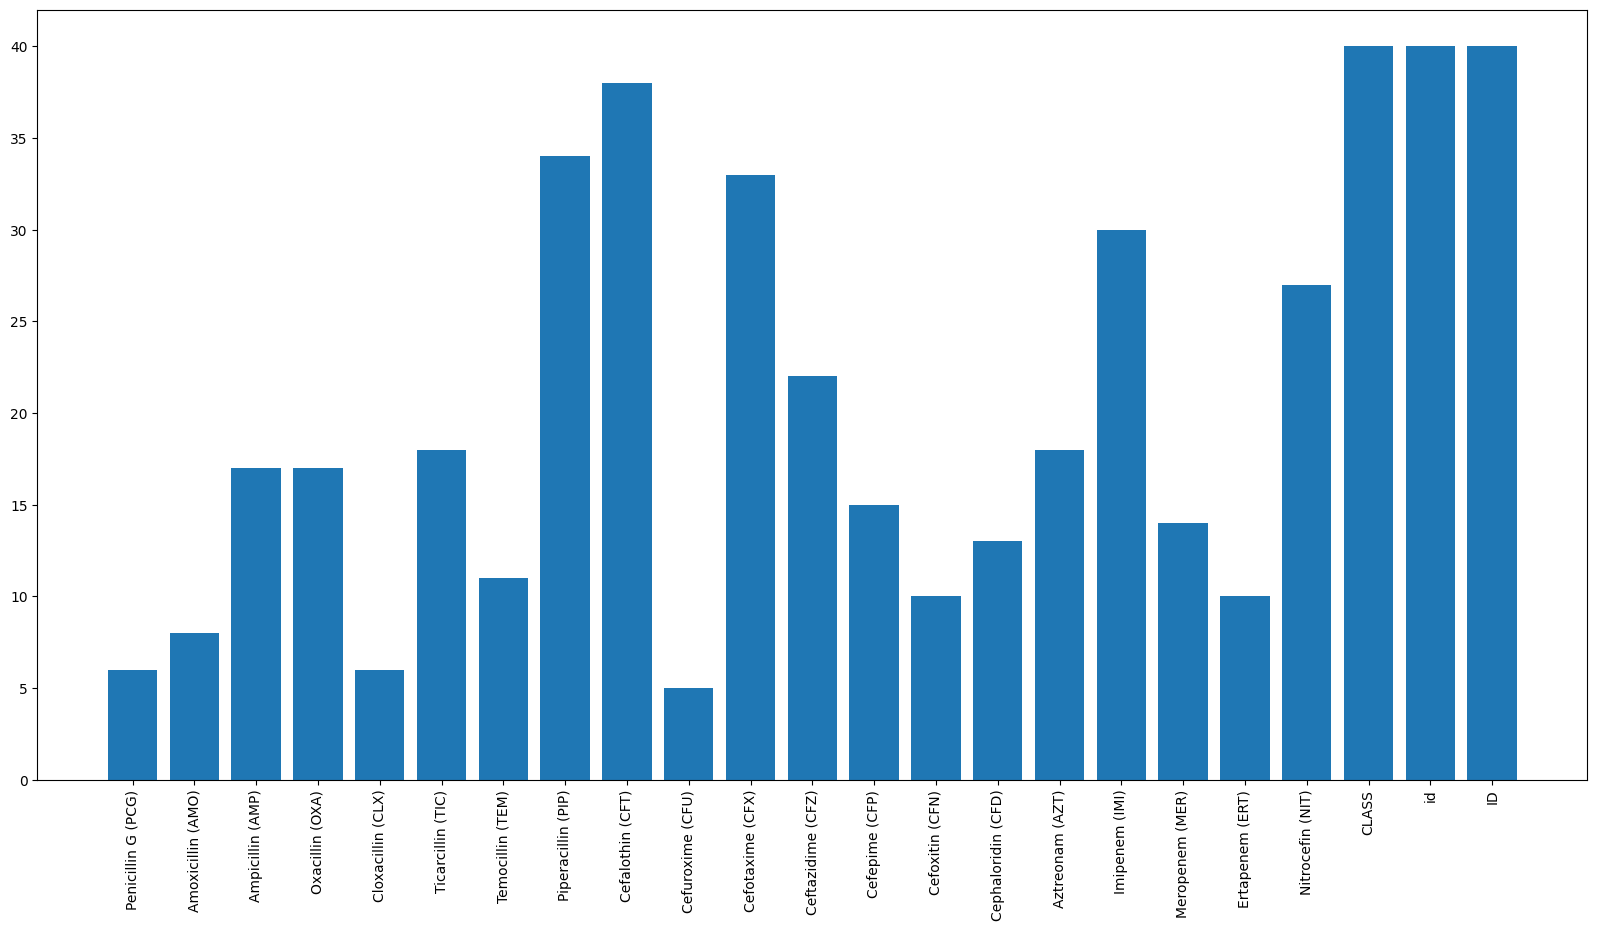

In [12]:
reduced_no_ids = no_ids.dropna(axis=1, thresh=5)
# plot number of values in each column as a bar chart

plt.figure(figsize=(20,10))
plt.bar(reduced_no_ids.columns, reduced_no_ids.count())
plt.xticks(rotation=90) 
plt.show()

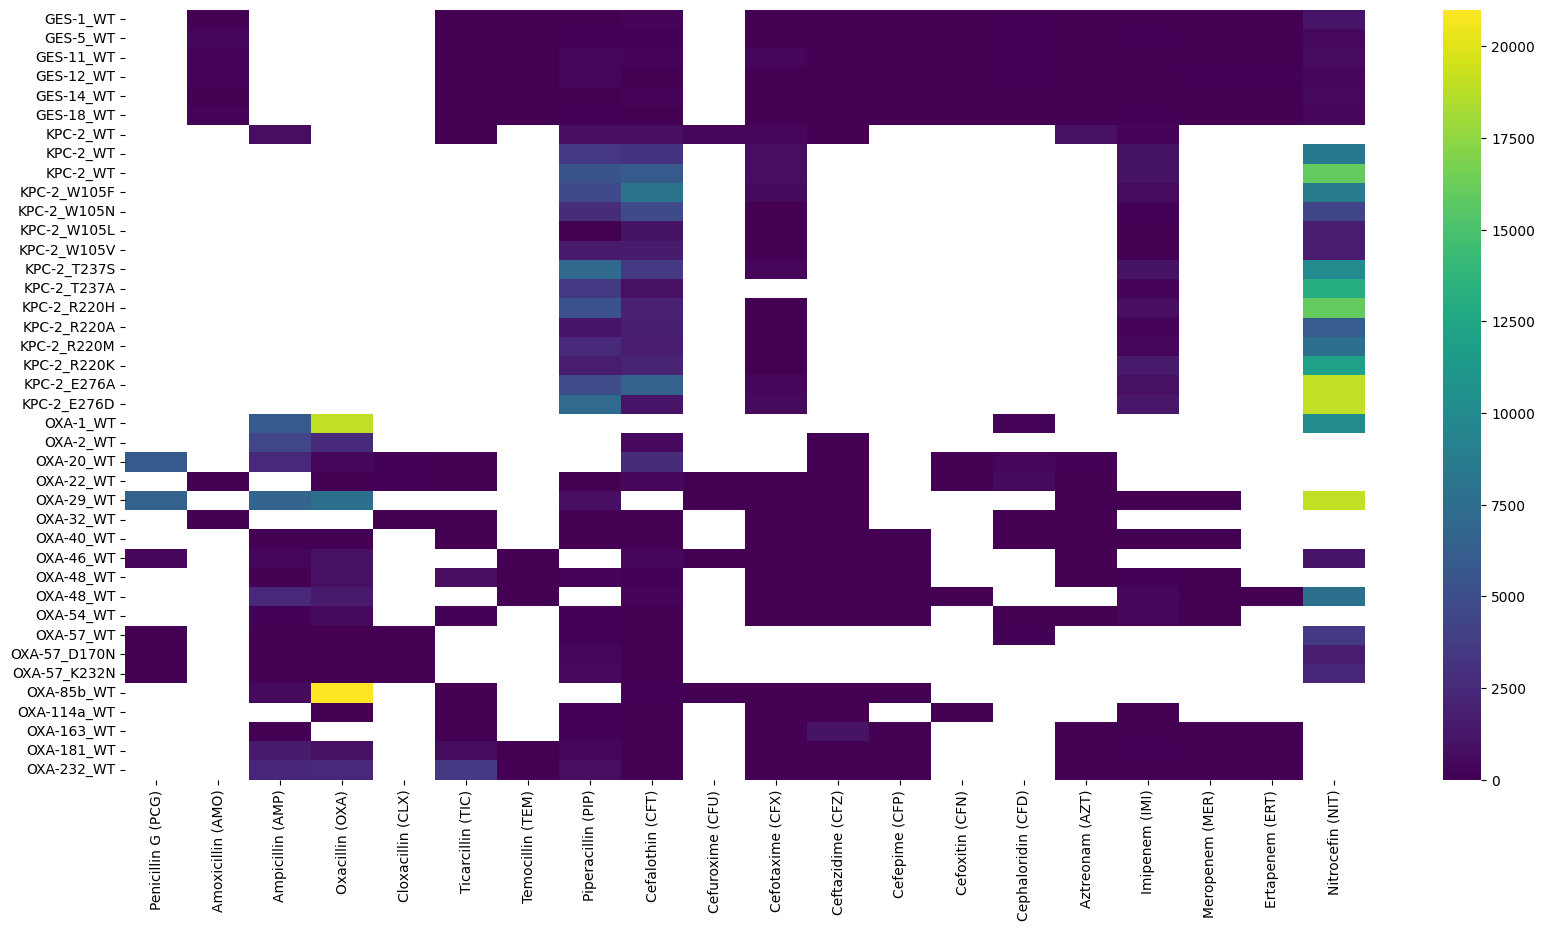

In [13]:

#plot the data as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

#do heatmap plotting dataframe without CLASS with CLASS as the y axis
sns.heatmap(reduced_no_ids.drop(['CLASS','id','ID'], axis=1), yticklabels=reduced_no_ids['ID'], cmap='viridis')
plt.show()

In [14]:
class_A_reduced = reduced_no_ids[reduced_no_ids.CLASS == 'A']
class_D_reduced = reduced_no_ids[reduced_no_ids.CLASS == 'D']
class_A_reduced=class_A_reduced.dropna(axis=1, thresh=5)
class_D_reduced=class_D_reduced.dropna(axis=1, thresh=5)

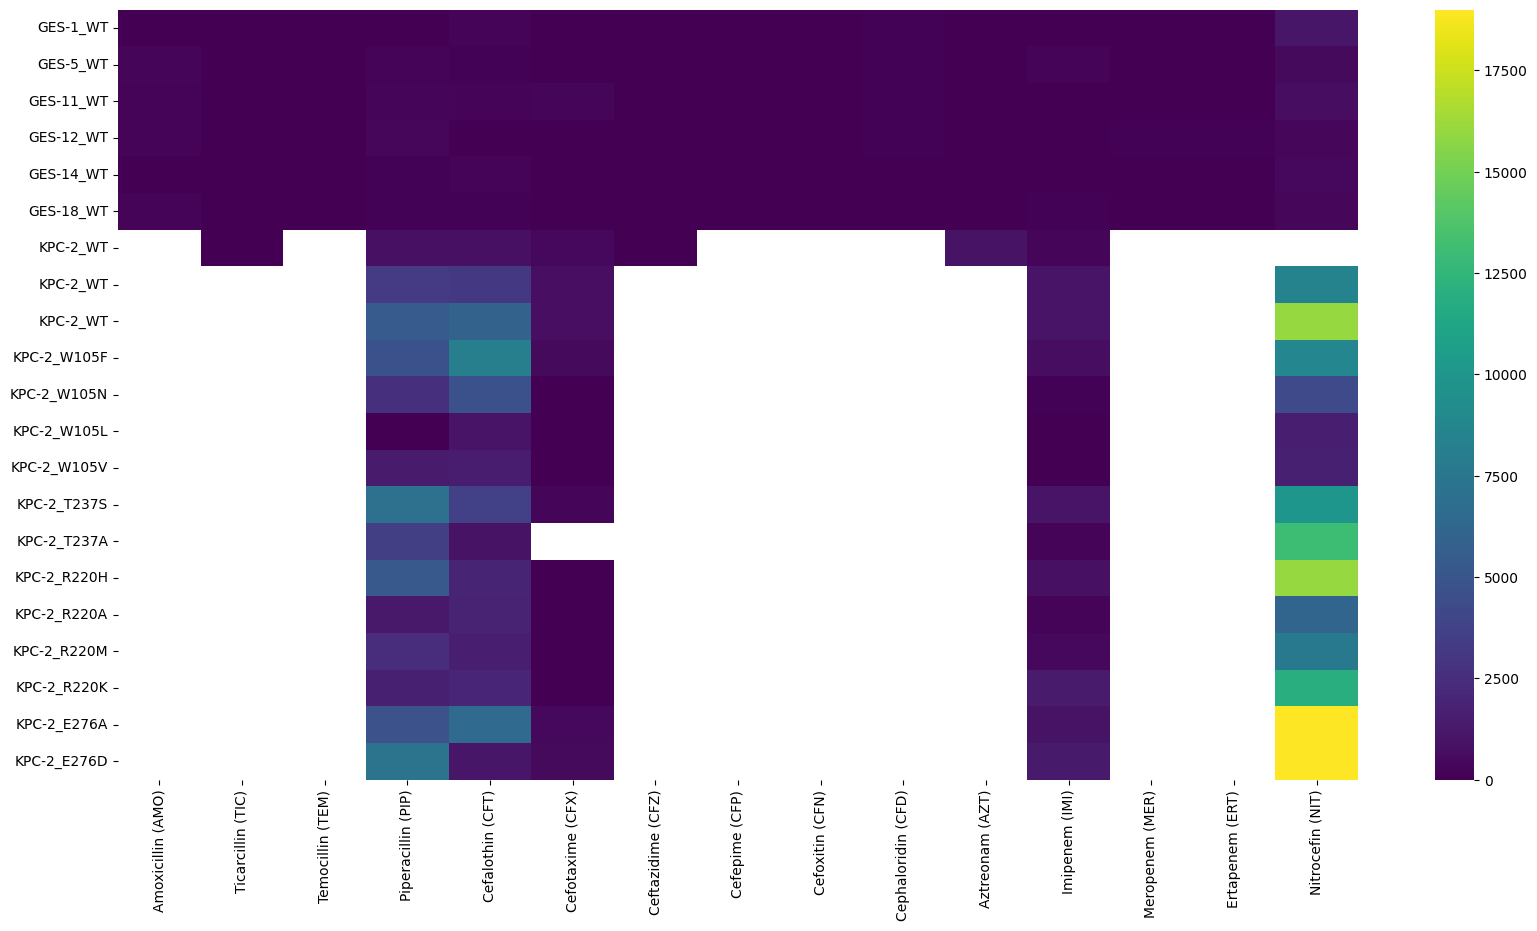

In [15]:

#plot the data as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

#do heatmap plotting dataframe without CLASS with CLASS as the y axis
sns.heatmap(class_A_reduced.drop(['CLASS','id','ID'], axis=1), yticklabels=class_A_reduced['ID'], cmap='viridis')
plt.show()

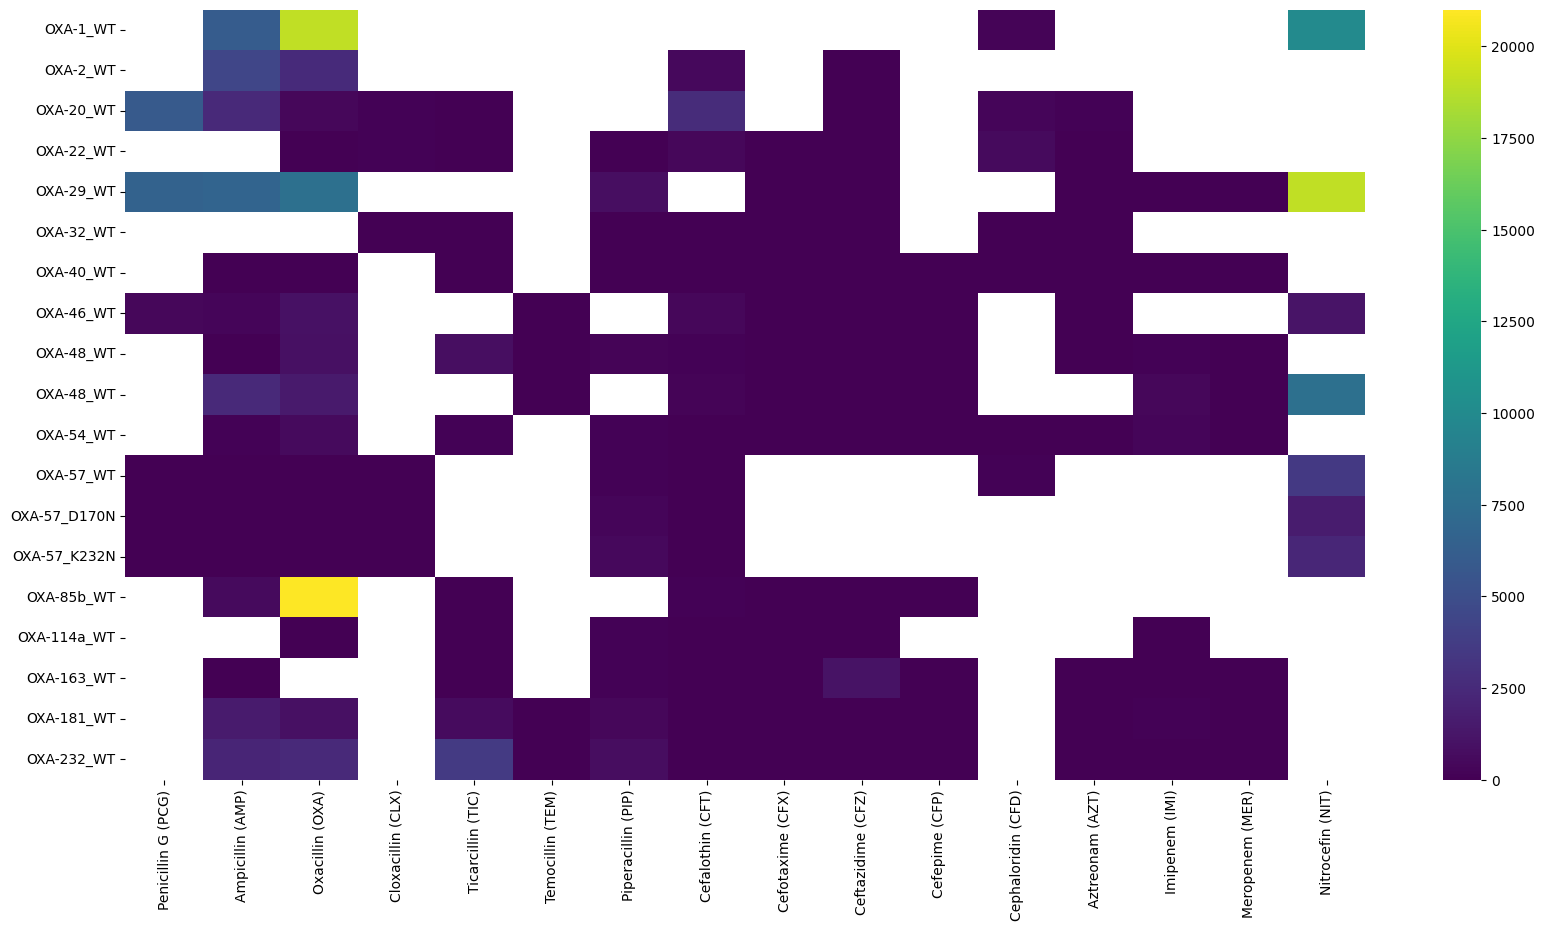

In [16]:

#plot the data as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

#do heatmap plotting dataframe without CLASS with CLASS as the y axis
sns.heatmap(class_D_reduced.drop(['CLASS','id','ID'], axis=1), yticklabels=class_D_reduced['ID'], cmap='viridis')
plt.show()

In [17]:
# add WT to the dataframe
# add active site mutations

In [18]:
# save the dataframe
class_A_reduced.to_csv('class_A_reduced.csv')
class_D_reduced.to_csv('class_D_reduced.csv')

